In [1]:
# import matplotlib.pyplot as plt
# from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
# JSON files from Kaggle were saved to github for retrevial
# https://www.kaggle.com/c/whats-cooking/data?select=test.json.zip
train_url = "https://raw.githubusercontent.com/hchuhtala/Recipe-ML-App/f22de810927f2ed0c079c1b021cd757a056ef24e/data/train.json"
test_url = "https://raw.githubusercontent.com/hchuhtala/Recipe-ML-App/f22de810927f2ed0c079c1b021cd757a056ef24e/data/test.json"

In [3]:
#Store data in Pandas Data Frames
train_df = pd.read_json(train_url).set_index('id')
train_df.head(10)

cuisine                                        ingredients
id                                                                   
10259        greek  [romaine lettuce, black olives, grape tomatoes...
25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
22213       indian                [water, vegetable oil, wheat, salt]
13162       indian  [black pepper, shallots, cornflour, cayenne pe...
6602      jamaican  [plain flour, sugar, butter, eggs, fresh ginge...
42779      spanish  [olive oil, salt, medium shrimp, pepper, garli...
3735       italian  [sugar, pistachio nuts, white almond bark, flo...
16903      mexican  [olive oil, purple onion, fresh pineapple, por...
12734      italian  [chopped tomatoes, fresh basil, garlic, extra-...

In [4]:
test_df = pd.read_json(test_url).set_index('id')

Data Clean Up:

In [5]:
train_df["cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [6]:
print("There are " + str(train_df.count()[0]) + " records in the raw data set")

There are 39774 records in the raw data set


In [7]:
# #dropping cuisines types that are not in both this data set and API used later in the app
cuisine_list = ['british', 'chinese', 'cajun_creole', 'french', 'greek', 'indian', 'irish', 'italian', 'japanese', 'korean', 'mexican', 'southern_us', 'spanish', 'thai', 'vietnamese']
train_clean_df = train_df[train_df.cuisine.isin(cuisine_list)]
train_clean_df.head()

cuisine                                        ingredients
id                                                                   
10259        greek  [romaine lettuce, black olives, grape tomatoes...
25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
22213       indian                [water, vegetable oil, wheat, salt]
13162       indian  [black pepper, shallots, cornflour, cayenne pe...
42779      spanish  [olive oil, salt, medium shrimp, pepper, garli...

In [8]:
print("We will be working with " + str(train_clean_df.count()[0]) + " records for our machine learning")

We will be working with 36716 records for our machine learning


In [9]:
train_clean_df.ingredients
train_clean_df.ingredients.str.strip()

id
10259   NaN
25693   NaN
22213   NaN
13162   NaN
42779   NaN
         ..
29109   NaN
11462   NaN
2238    NaN
41882   NaN
2362    NaN
Name: ingredients, Length: 36716, dtype: float64

In [10]:

test_list = pd.DataFrame({'values': [' [romaine lettuce, black olives, grape tomatoes]', '[plain flour, ground pepper, salt, tomatoes]']})
test_list['values'].str.strip()


0    [romaine lettuce, black olives, grape tomatoes]
1       [plain flour, ground pepper, salt, tomatoes]
Name: values, dtype: object

Data Exploration:

In [11]:
#Missing values in training set
train_clean_df.isnull().sum()

cuisine        0
ingredients    0
dtype: int64

In [12]:
summary1 = train_clean_df.cuisine.value_counts()
summary1 = summary1.to_frame()
summary = summary1.reset_index()
summary = summary.rename(columns = {'index':'cuisine', 'cuisine': 'count'})
summary

cuisine  count
0        italian   7838
1        mexican   6438
2    southern_us   4320
3         indian   3003
4        chinese   2673
5         french   2646
6   cajun_creole   1546
7           thai   1539
8       japanese   1423
9          greek   1175
10       spanish    989
11        korean    830
12    vietnamese    825
13       british    804
14         irish    667

In [13]:
import plotly.express as px
fig = px.pie(summary, values='count', names='cuisine')
fig.show()

In [14]:
fig = px.bar(summary, y ='count', x ='cuisine', title = 'Number of Records Per Cuisine')
fig.show()

In [15]:
# There is an imbalance with the data becasue cuisines like Italian and Mexican have many more records

In [16]:
# 
list_df = train_clean_df[train_df.ingredients = 'list']
list_df.head()

SyntaxError: invalid syntax (<ipython-input-16-0ec69c48645e>, line 2)

In [17]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
# from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

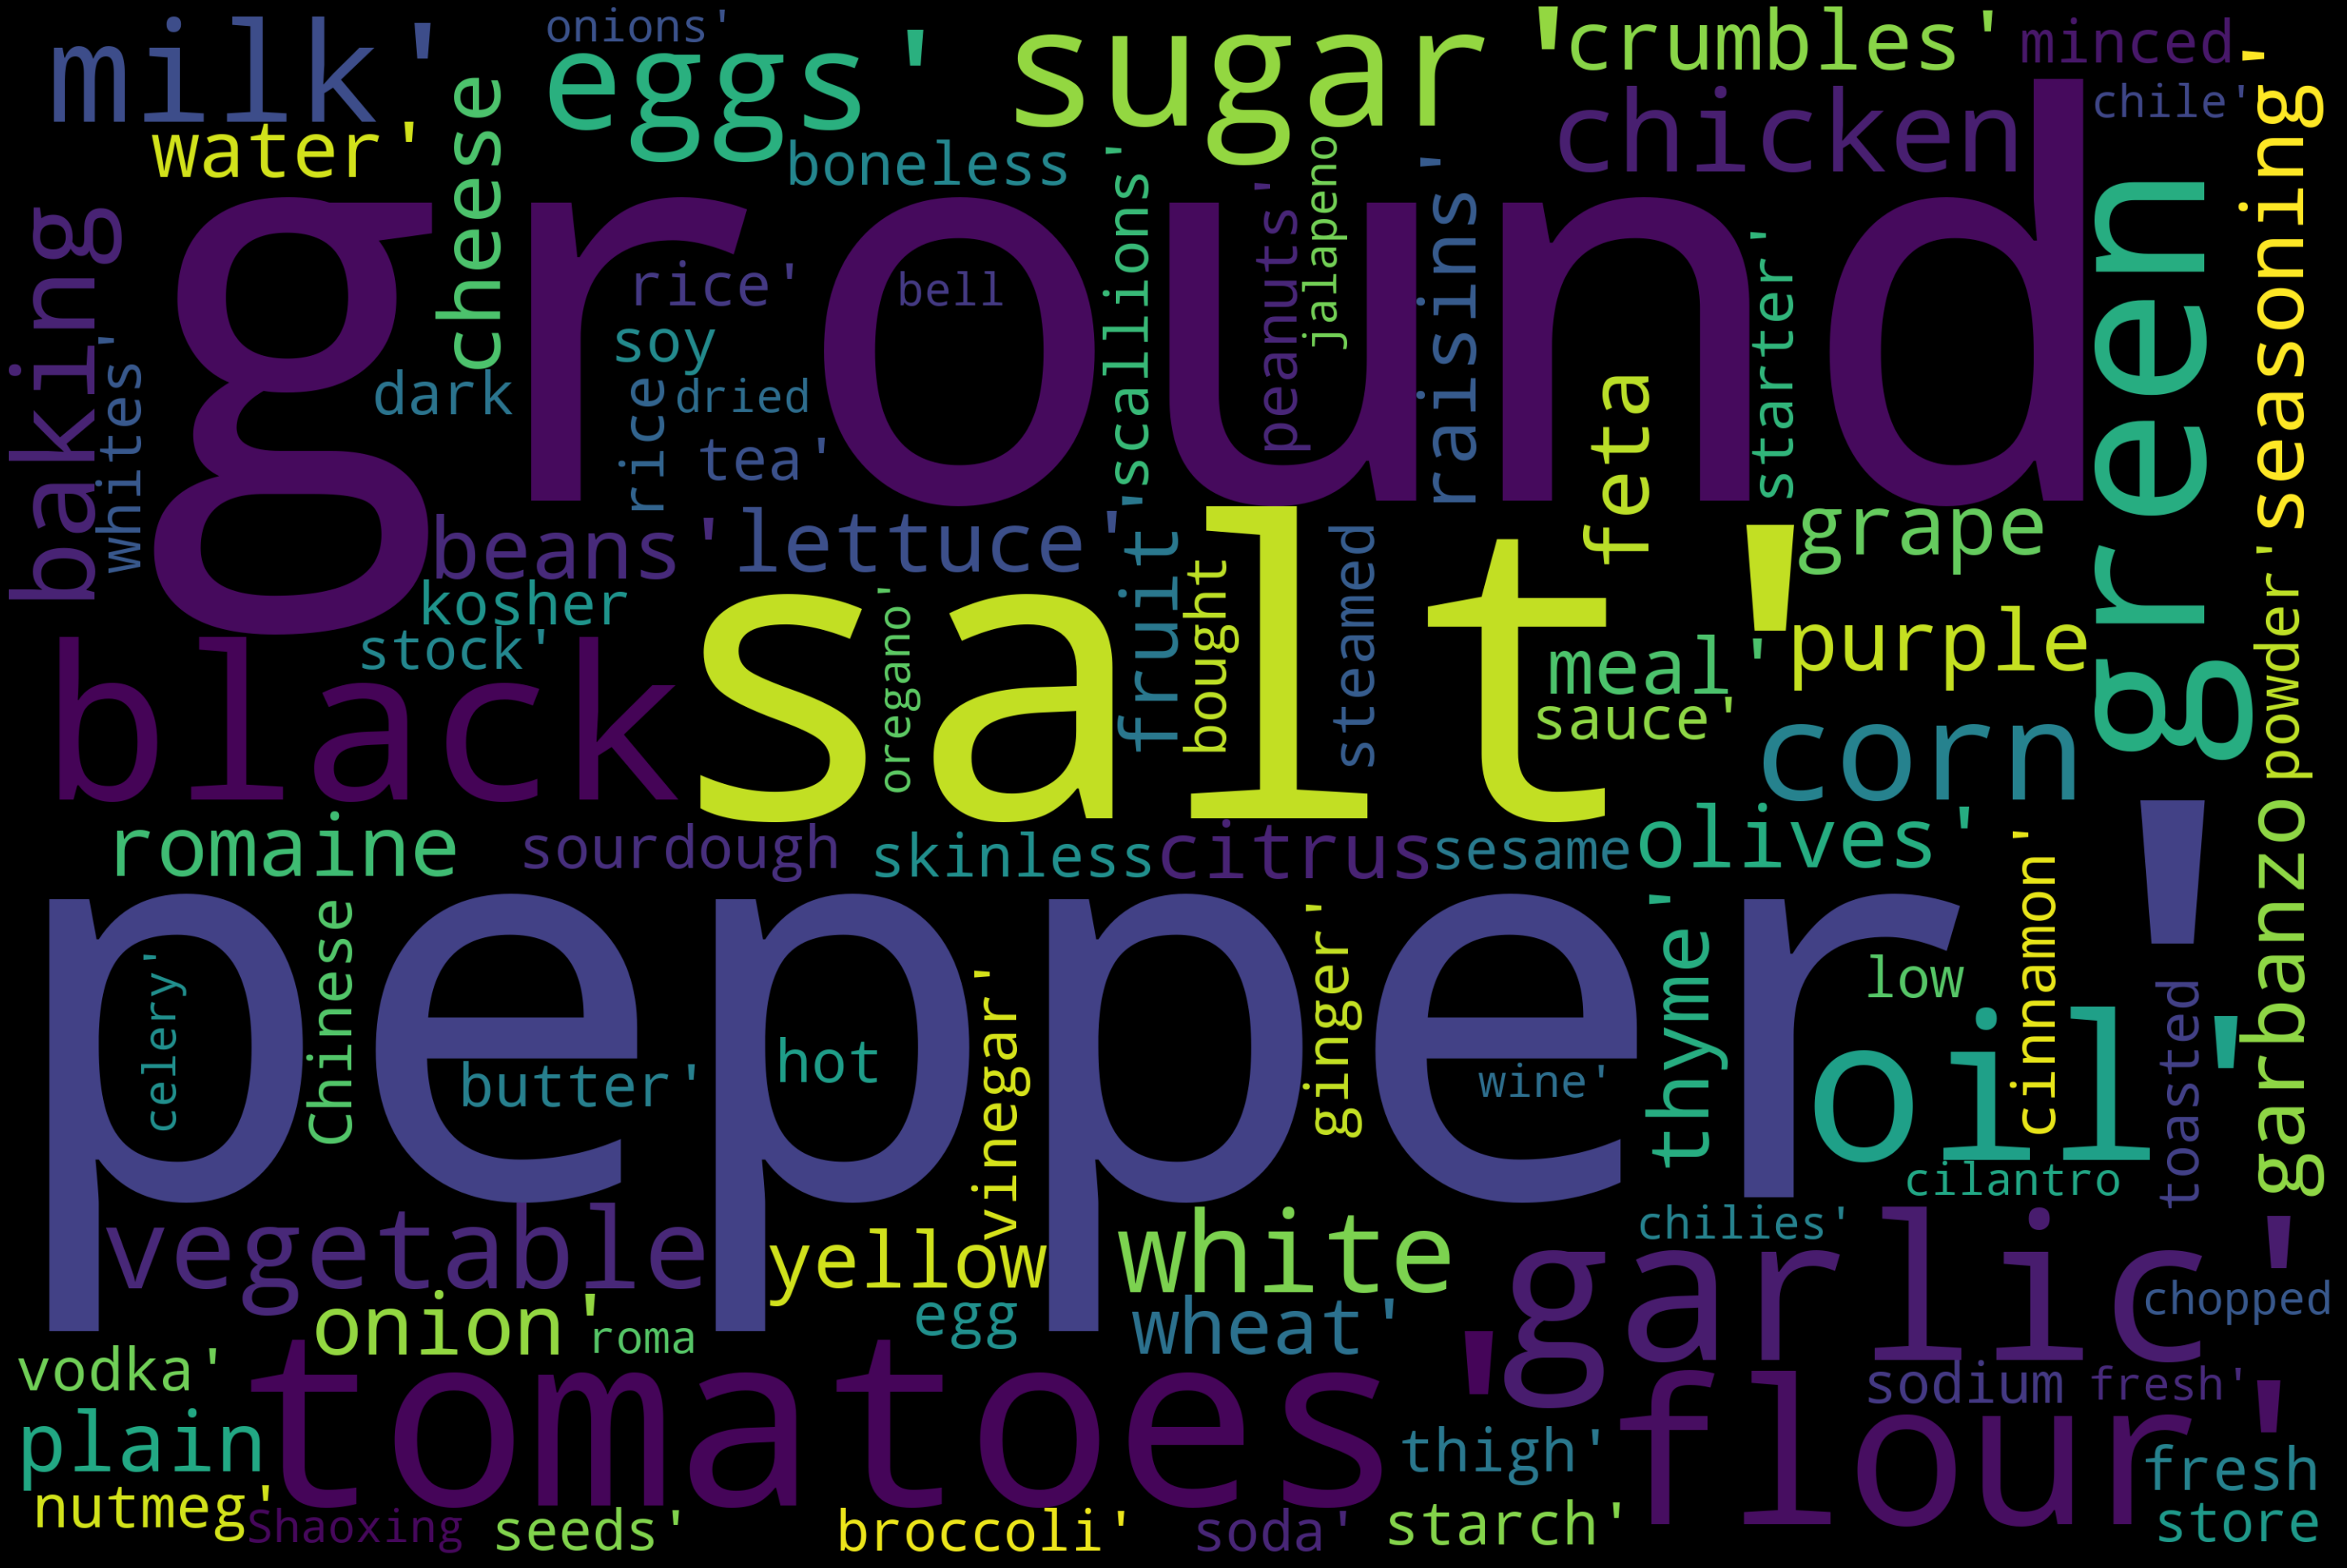

In [18]:
text = train_clean_df.ingredients.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = {'list'}
#     , regexp = 
    ).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
ing_summary1 = train_clean_df.ingredients.value_counts()
ing_summary1 = ing_summary1.to_frame()
# ing_summary = ing_summary1.reset_index()
# ing_summary = ing_summary.rename(columns = {'index':'cuisine', 'cuisine': 'count'})
ing_summary1

TypeError: unhashable type: 'list'

In [ ]:
train_clean_df